In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
from matplotlib.image import imread
import glob


In [2]:
def calcular_histograma_medio_np(diretorio_imagens):
    # Inicializando os histogramas para R, G, B
    hist_r_total = np.zeros(256)
    hist_g_total = np.zeros(256)
    hist_b_total = np.zeros(256)

    # Contagem de imagens processadas
    num_imagens = 0
    print(diretorio_imagens)
    # Processa cada imagem no diretório
    for arquivo in diretorio_imagens:
        if arquivo.endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            # Carrega a imagem
            # caminho_imagem = os.path.join(diretorio_imagens, arquivo)
            imagem = imread(arquivo)
            
            if imagem is None or imagem.ndim < 3:
                continue
            
            # Garantir que a imagem tenha 3 canais (R, G, B)
            if imagem.shape[2] == 4:
                # Remover o canal alpha (se existir)
                imagem = imagem[:, :, :3]
            
            # Converte os valores para um intervalo de 0 a 255 se não estiverem (imagens normalizadas entre 0 e 1)
            if imagem.max() <= 1.0:
                imagem = (imagem * 255).astype(np.uint8)
            
            # Calcula os histogramas para cada canal de cor (R, G, B)
            hist_r, _ = np.histogram(imagem[:, :, 0], bins=256, range=(0, 256))
            hist_g, _ = np.histogram(imagem[:, :, 1], bins=256, range=(0, 256))
            hist_b, _ = np.histogram(imagem[:, :, 2], bins=256, range=(0, 256))

            # Soma os histogramas para cálculo da média
            hist_r_total += hist_r
            hist_g_total += hist_g
            hist_b_total += hist_b

            num_imagens += 1

    # Calcula a média dos histogramas
    if num_imagens > 0:
        hist_r_medio = hist_r_total / num_imagens
        hist_g_medio = hist_g_total / num_imagens
        hist_b_medio = hist_b_total / num_imagens

        return hist_r_medio, hist_g_medio, hist_b_medio
    else:
        print("Nenhuma imagem válida foi encontrada no diretório.")

In [3]:

# Caminho da imagem
image_paths_slum = glob.glob("../dataset/GMAPS_RGB_SP_2024/*_1.png")
image_paths_not_slum = glob.glob("../dataset/GMAPS_RGB_SP_2024/*_0.png")

slum_hist_r_medio, slum_hist_g_medio, slum_hist_b_medio = calcular_histograma_medio_np(image_paths_slum)
not_slum_hist_r_medio, not_slum_hist_g_medio, not_slum_hist_b_medio = calcular_histograma_medio_np(image_paths_not_slum)

['../dataset/GMAPS_RGB_SP_2024/307510_1.png', '../dataset/GMAPS_RGB_SP_2024/276211_1.png', '../dataset/GMAPS_RGB_SP_2024/49192_1.png', '../dataset/GMAPS_RGB_SP_2024/117635_1.png', '../dataset/GMAPS_RGB_SP_2024/118048_1.png', '../dataset/GMAPS_RGB_SP_2024/92152_1.png', '../dataset/GMAPS_RGB_SP_2024/105010_1.png', '../dataset/GMAPS_RGB_SP_2024/276953_1.png', '../dataset/GMAPS_RGB_SP_2024/121718_1.png', '../dataset/GMAPS_RGB_SP_2024/273146_1.png', '../dataset/GMAPS_RGB_SP_2024/279118_1.png', '../dataset/GMAPS_RGB_SP_2024/237590_1.png', '../dataset/GMAPS_RGB_SP_2024/297884_1.png', '../dataset/GMAPS_RGB_SP_2024/305312_1.png', '../dataset/GMAPS_RGB_SP_2024/175738_1.png', '../dataset/GMAPS_RGB_SP_2024/43368_1.png', '../dataset/GMAPS_RGB_SP_2024/41818_1.png', '../dataset/GMAPS_RGB_SP_2024/80941_1.png', '../dataset/GMAPS_RGB_SP_2024/78362_1.png', '../dataset/GMAPS_RGB_SP_2024/187192_1.png', '../dataset/GMAPS_RGB_SP_2024/121996_1.png', '../dataset/GMAPS_RGB_SP_2024/200390_1.png', '../dataset/GMA

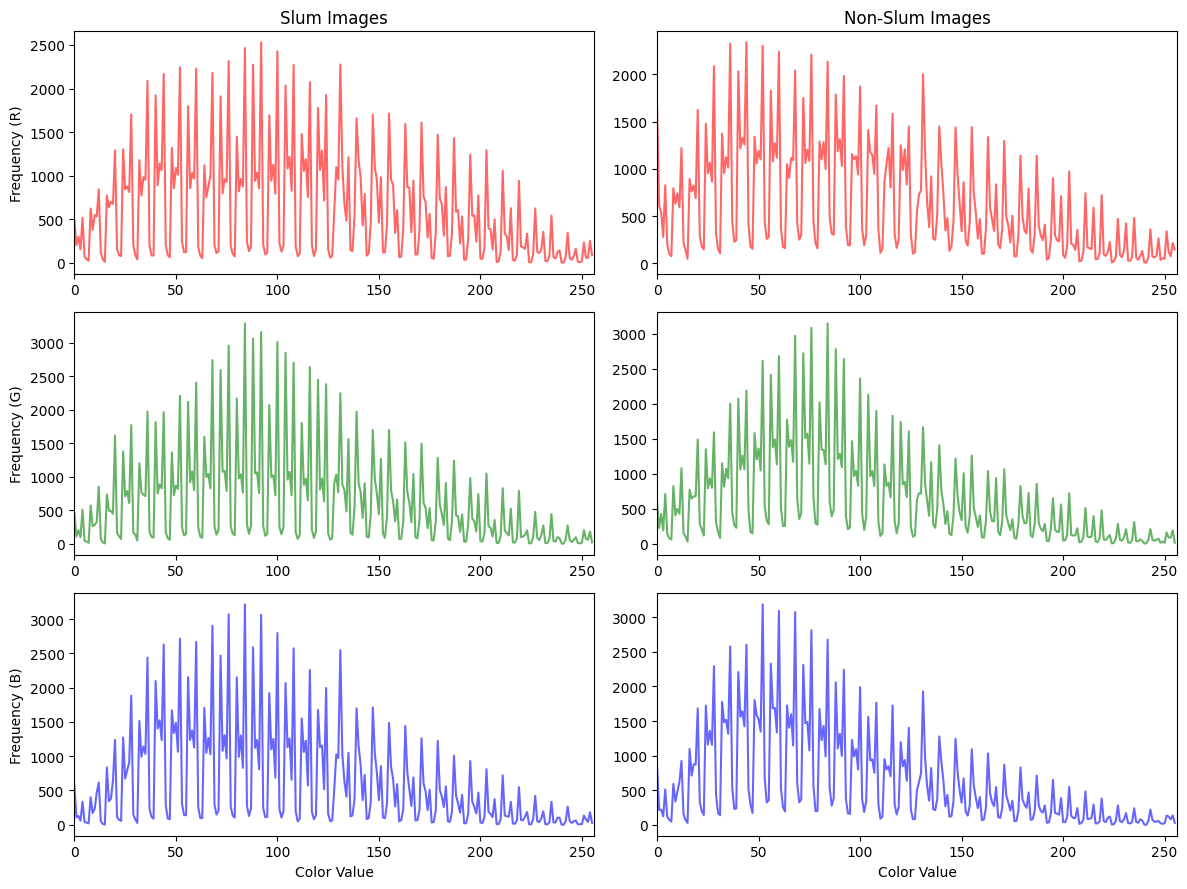

In [14]:
fig, axes = plt.subplots(3, 2, figsize=(12, 9))

# Títulos das colunas
axes[0, 0].set_title("Slum Images")
axes[0, 1].set_title("Non-Slum Images")

# Imagem 1
axes[0, 0].plot(range(256), slum_hist_r_medio, color='r', alpha=0.6)
axes[0, 0].set_ylabel('Frequency (R)')
axes[0, 0].set_xlim([0, 256])

axes[1, 0].plot(range(256), slum_hist_g_medio, color='g', alpha=0.6)
axes[1, 0].set_ylabel('Frequency (G)')
axes[1, 0].set_xlim([0, 256])

axes[2, 0].plot(range(256), slum_hist_b_medio, color='b', alpha=0.6)
axes[2, 0].set_ylabel('Frequency (B)')
axes[2, 0].set_xlim([0, 256])
axes[2, 0].set_xlabel('Color Value')

# Imagem 2
axes[0, 1].plot(range(256), not_slum_hist_r_medio, color='r', alpha=0.6)
axes[0, 1].set_xlim([0, 256])

axes[1, 1].plot(range(256), not_slum_hist_g_medio, color='g', alpha=0.6)
axes[1, 1].set_xlim([0, 256])

axes[2, 1].plot(range(256), not_slum_hist_b_medio, color='b', alpha=0.6)
axes[2, 1].set_xlim([0, 256])
axes[2, 1].set_xlabel('Color Value')

# Ajustar espaçamentos
plt.tight_layout()
plt.show()